### BE m228 Final Project

#### Import Libraries

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import sqlite3
from sqlite3 import Error

import seaborn as sns

#### Read in Data

In [25]:
demographics = pd.read_csv('data/bio.csv')
demographics.head(3)

# defining if patient is diabetic, pre-diabetic, or not diabetic based on A1c levels
def diabetic_status(a1c):
    if a1c < 5.7:
        return 'Not Diabetic'
    elif 5.7 <= a1c <= 6.4:
        return 'Pre-Diabetic'
    else:
        return 'Diabetic'

demographics['Diabetic Status'] = demographics['A1c PDL (Lab)'].apply(diabetic_status)
demographics.head(3)

,subject,Age,Gender,BMI,Body weight,Height,Self-identify,A1c PDL (Lab),Fasting GLU - PDL (Lab),Insulin,...,VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2,Diabetic Status
0,1,27,M,22.265239,133.8,65.0,Hispanic/Latino,5.4,91,2.5,...,13,2.9,11:06:00 AM,89,9:40,73,12:11,81,13:18,Not Diabetic
1,2,49,F,30.946742,169.2,62.0,Hispanic/Latino,5.5,93,14.8,...,12,2.0,7:38:00 AM,91,7:52,123,9:21,80,10:22,Not Diabetic
2,3,59,F,26.948690,157.0,64.0,Hispanic/Latino,6.5,118,17.4,...,31,2.6,7:25:00 AM,119,7:38,166,9:23,98,10:23,Diabetic


In [26]:
# getting counts of each diabetic status category
diabetic_counts = demographics['Diabetic Status'].value_counts()
print(diabetic_counts)


Diabetic Status
Pre-Diabetic    16
Not Diabetic    15
Diabetic        14
Name: count, dtype: int64


#### Participant One Example

In [27]:
participant_one = pd.read_csv('participants/CGMacros-001.csv')
participant_one.head(3)

,Unnamed: 0,Timestamp,Libre GL,Dexcom GL,HR,Calories (Activity),METs,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,Image path
0,0,2020-05-01 10:30:00,84.000000,NaN,56.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-05-01 10:32:00,84.266667,NaN,57.0,1.0484,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


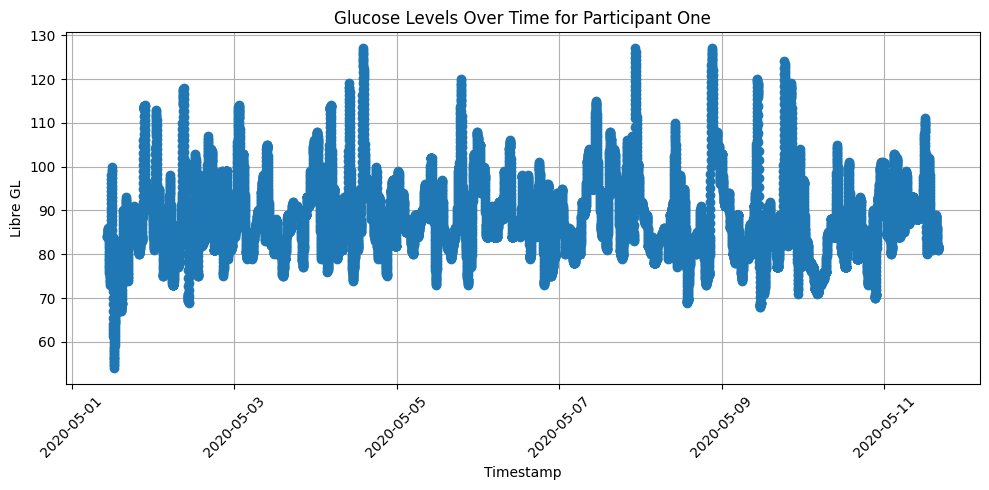

In [29]:
# transform timestamp column to datetime format
participant_one['Timestamp'] = pd.to_datetime(participant_one['Timestamp'])
# plotting glucose levels 'Libre GL' for participant_one    
plt.figure(figsize=(10, 5))
plt.plot(participant_one['Timestamp'], participant_one['Libre GL'], marker='o')
plt.title('Glucose Levels Over Time for Participant One')
plt.xlabel('Timestamp')
plt.ylabel('Libre GL')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

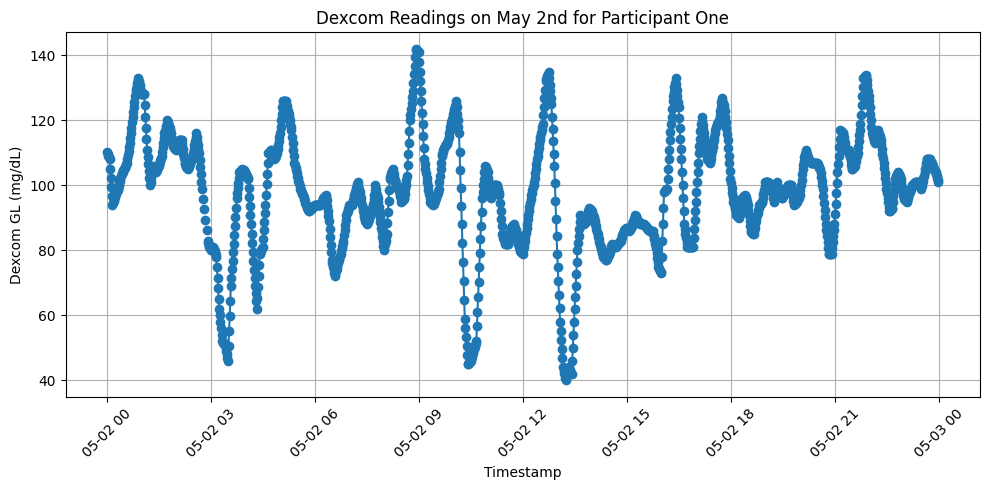

In [117]:
# plotting glucose data for participant_one only for day one (2020-05-01)
participant_one_day_one = participant_one[participant_one['Timestamp'].dt.date == pd.to_datetime('2020-05-02').date()]
plt.figure(figsize=(10, 5))
plt.plot(participant_one_day_one['Timestamp'], participant_one_day_one['Dexcom GL'], marker='o')
plt.title('Dexcom Readings on May 2nd for Participant One')
plt.xlabel('Timestamp')
plt.ylabel('Dexcom GL (mg/dL)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

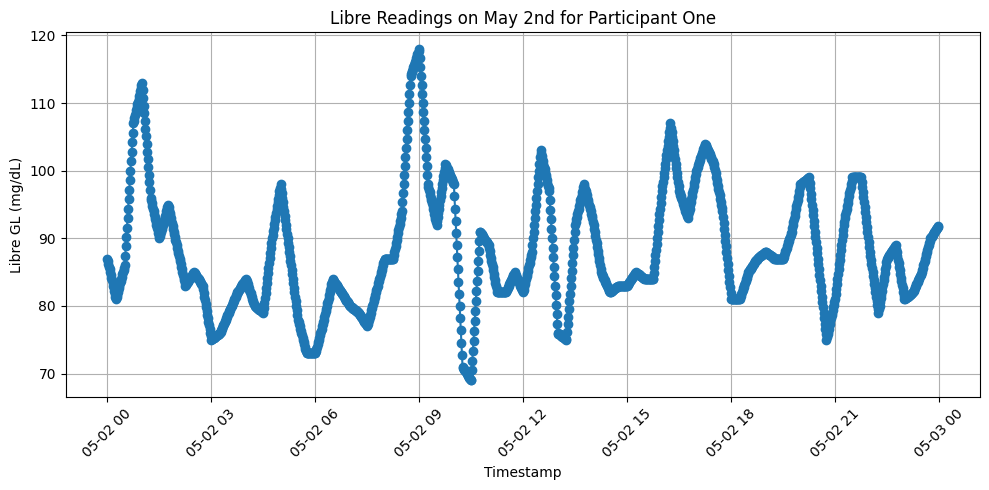

In [30]:
# plotting glucose data for participant_one only for day one (2020-05-01)
participant_one_day_one = participant_one[participant_one['Timestamp'].dt.date == pd.to_datetime('2020-05-02').date()]
plt.figure(figsize=(10, 5))
plt.plot(participant_one_day_one['Timestamp'], participant_one_day_one['Libre GL'], marker='o')
plt.title('Libre Readings on May 2nd for Participant One')
plt.xlabel('Timestamp')
plt.ylabel('Libre GL (mg/dL)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

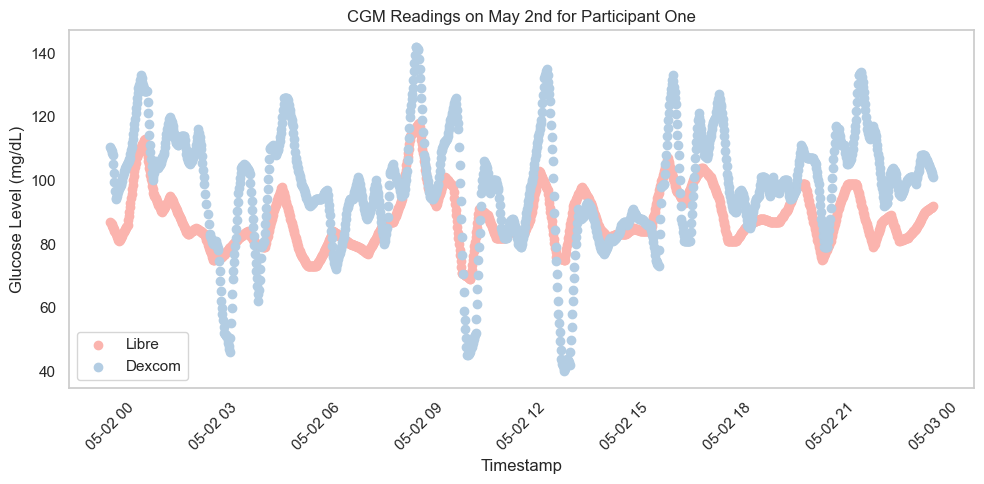

In [66]:
# overlay dexcom and libre plots

# plotting glucose data for participant_one only for day one (2020-05-01)
participant_one_day_one = participant_one[participant_one['Timestamp'].dt.date == pd.to_datetime('2020-05-02').date()]
plt.figure(figsize=(10, 5))
plt.scatter(participant_one_day_one['Timestamp'], participant_one_day_one['Libre GL'], marker='o', label = 'Libre')
plt.scatter(participant_one_day_one['Timestamp'], participant_one_day_one['Dexcom GL'], marker='o', label = 'Dexcom')
plt.title('CGM Readings on May 2nd for Participant One')
plt.xlabel('Timestamp')
plt.ylabel('Glucose Level (mg/dL)')
plt.xticks(rotation=45)
sns.set_palette("Pastel1")

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# create database from data

def create_connection(db_file):
    """ Create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Database created successfully at: {db_file}")
    except Error as e:
        print(f"Error: {e}")
    finally:
        if conn:
            conn.close()

create_connection("bem228_project.db")


Database created successfully at: bem228_project.db


In [141]:
# create preliminary data table

conn = sqlite3.connect('bem228_project.db')

# add in prelim data
df = pd.DataFrame()

# concat parts of demographics df
df = pd.concat([df, demographics['subject']], axis=1)
df = pd.concat([df, demographics['Age']], axis=1)
df = pd.concat([df, demographics['BMI']], axis=1)
df = pd.concat([df, demographics['A1c PDL (Lab)']], axis=1)
df = pd.concat([df, demographics['Diabetic Status']], axis=1)

df.to_sql('prelim_data', conn, if_exists='replace', index=False) # index=False prevents writing the DataFrame index as a column

# 4. Commit changes and close the connection
conn.commit()
conn.close()


In [142]:
# calculate basic stats for each participant's data
def calc_desc_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    stdev = np.std(data)
    return mean, median, stdev

# add column to database if doesn't already exist
def add_column(cursor,column_name,data_type):
    try:
        cursor.execute(f"ALTER TABLE prelim_data ADD COLUMN {column_name} {data_type}")
    except sqlite3.OperationalError:
        # This error occurs if the column already exists
        pass 

def check_bounds(data):
    # define healthy glucose levels
    upper_bound = 140
    lower_bound = 70

    is_within_range = (data >= lower_bound) & (data <= upper_bound)
    count_within_range = is_within_range.sum()
    total_count = data.size
    percentage = (count_within_range / total_count) * 100
    return percentage
    

In [123]:
# get percentage of glucose measurements in healthy range

libre_data = participant_one['Libre GL']
dexcom_data = participant_one['Dexcom GL']

dexcom_perc = check_bounds(dexcom_data)
libre_perc = check_bounds(libre_data)

print(f"percentage of libre data within range: {libre_perc:.2f}%")
print(f"percentage of dexcom data within range: {dexcom_perc:.2f}%")

percentage of libre data within range: 99.13%
percentage of dexcom data within range: 94.46%


In [143]:
# open database
conn = sqlite3.connect('bem228_project.db')
cursor = conn.cursor()

for val in demographics['subject']:
    # pad subject id with leading zeros
    padded_id = f"{val:03}"
    cgm_data = pd.read_csv(f'participants/CGMacros-{padded_id}.csv')

    # get cgm data
    libre_data = cgm_data['Libre GL']
    dexcom_data = cgm_data['Dexcom GL']

    # calculate descriptive stats
    dexcom_mean, dexcom_median, dexcom_stdev = calc_desc_stats(dexcom_data)
    libre_mean, libre_median, libre_stdev = calc_desc_stats(libre_data)

    # calculate percentage of measurements in healthy limits
    dexcom_perc = check_bounds(dexcom_data)
    libre_perc = check_bounds(libre_data)

    # add column if doesn't already exist
    add_column(cursor,'dexcom_perc_in_healthy','REAL')
    add_column(cursor,'dexcom_mean_gl','REAL')
    add_column(cursor,'dexcom_median_gl','REAL')
    add_column(cursor,'dexcom_stdev_gl','REAL')

    add_column(cursor,'libre_perc_in_healthy','REAL')
    add_column(cursor,'libre_mean_gl','REAL')
    add_column(cursor,'libre_median_gl','REAL')
    add_column(cursor,'libre_stdev_gl','REAL')

    data_tuple = tuple([dexcom_perc, libre_perc, dexcom_mean, libre_mean, dexcom_median, libre_median, dexcom_stdev, libre_stdev, val])
    # add to database
    update_query = '''
    UPDATE prelim_data
    SET dexcom_perc_in_healthy = ?, libre_perc_in_healthy = ?, dexcom_mean_gl = ?, libre_mean_gl = ?, dexcom_median_gl = ?, libre_median_gl = ?, dexcom_stdev_gl = ?, libre_stdev_gl = ?
    WHERE subject = ?
    '''
    
    # Execute and commit
    cursor.execute(update_query, data_tuple)
    conn.commit()

conn.close()
    

In [ ]:
# add gut health test to database
gut_health = pd.read_csv('data/gut_health_test.csv')
microbes_data = pd.read_csv('data/microbes.csv')

# open database
conn = sqlite3.connect('bem228_project.db')

# add gut health data to db
gut_health.to_sql('gut_health_data', conn, if_exists='append', index=False)
microbes_data.to_sql('microbe_data', conn, if_exists='append', index=False)

# close database
conn.commit()
conn.close()

#### eda plots

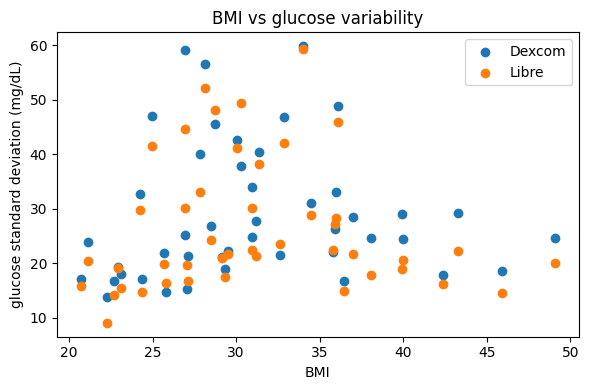

In [128]:
# plot BMI vs glucose variability (sd) for both sensors
conn = sqlite3.connect('bem228_project.db')

sql_query = "SELECT BMI, dexcom_stdev_gl, libre_stdev_gl FROM prelim_data"
read_df = pd.read_sql_query(sql_query, conn)

# Ensure the connection is closed
conn.close()

# plot BMI vs glucose standard deviation
plt.figure(figsize=(6, 4))
plt.scatter(read_df['BMI'], read_df['dexcom_stdev_gl'], marker='o', label = 'Dexcom')
plt.scatter(read_df['BMI'], read_df['libre_stdev_gl'], marker='o', label = 'Libre')

plt.title('BMI vs glucose variability')
plt.xlabel('BMI')
plt.ylabel('glucose standard deviation (mg/dL)')
plt.legend()
plt.tight_layout()
plt.show()

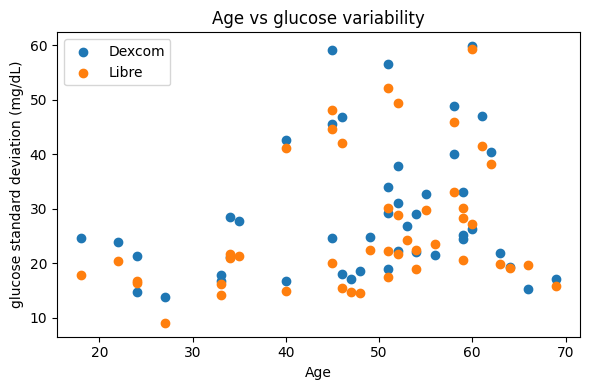

In [129]:
# plot Age vs glucose variability (sd) for both sensors
conn = sqlite3.connect('bem228_project.db')

sql_query = "SELECT Age, dexcom_stdev_gl, libre_stdev_gl FROM prelim_data"
read_df = pd.read_sql_query(sql_query, conn)

# Ensure the connection is closed
conn.close()

# plot Age vs glucose standard deviation
plt.figure(figsize=(6, 4))
plt.scatter(read_df['Age'], read_df['dexcom_stdev_gl'], marker='o', label = 'Dexcom')
plt.scatter(read_df['Age'], read_df['libre_stdev_gl'], marker='o', label = 'Libre')

plt.title('Age vs glucose variability')
plt.xlabel('Age')
plt.ylabel('glucose standard deviation (mg/dL)')
plt.legend()
plt.tight_layout()
plt.show()

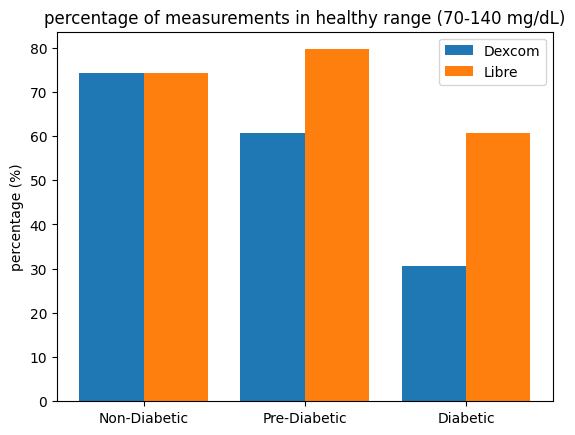

In [139]:
# create bar plot of average % of measurements in healthy range for each group

conn = sqlite3.connect('bem228_project.db')

col_name = "\"Diabetic Status\""
sql_query = f"SELECT {col_name}, dexcom_perc_in_healthy, libre_perc_in_healthy FROM prelim_data"
read_df = pd.read_sql_query(sql_query, conn)

# Ensure the connection is closed
conn.close()

# extract data
diab_rows = read_df[read_df['Diabetic Status'] == 'Diabetic']
non_diab_rows = read_df[read_df['Diabetic Status'] == 'Not Diabetic']
pre_diab_rows = read_df[read_df['Diabetic Status'] == 'Pre-Diabetic']

mean_dexcom_diab = np.mean(diab_rows['dexcom_perc_in_healthy'])
mean_libre_diab = np.mean(diab_rows['libre_perc_in_healthy'])

mean_dexcom_non_diab = np.mean(non_diab_rows['dexcom_perc_in_healthy'])
mean_libre_non_diab = np.mean(non_diab_rows['libre_perc_in_healthy'])

mean_dexcom_pre_diab = np.mean(pre_diab_rows['dexcom_perc_in_healthy'])
mean_libre_pre_diab = np.mean(pre_diab_rows['libre_perc_in_healthy'])

cats = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic'] # categories
vals1, vals2 = [mean_dexcom_non_diab, mean_dexcom_pre_diab, mean_dexcom_diab], [mean_libre_non_diab, mean_libre_pre_diab, mean_libre_diab]

# Bar width and x locations
w, x = 0.4, np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w/2, vals1, width=w, label='Dexcom')
ax.bar(x + w/2, vals2, width=w, label='Libre')

ax.set_xticks(x)
ax.set_xticklabels(cats)
ax.set_ylabel('percentage (%)')
ax.set_title('percentage of measurements in healthy range (70-140 mg/dL)')
ax.legend()

plt.show()

In [67]:
def plot_gut_health_stability(gut_health_test):
    conn = sqlite3.connect('bem228_project.db')

    col_name = f"\"{gut_health_test}\""
    col_name2 = "\"Diabetic Status\""
    sql_query = f"SELECT gut_health_data.{col_name}, prelim_data.dexcom_stdev_gl, prelim_data.{col_name2} FROM gut_health_data INNER JOIN prelim_data ON gut_health_data.subject = prelim_data.subject"
    read_df = pd.read_sql_query(sql_query, conn)

    read_df[gut_health_test] = read_df[gut_health_test].map({
        1: "Not Optimal",
        2: "Average",
        3: "Good"
    })

    plt.figure(figsize=(7, 5))

    order = ["Not Optimal", "Average", "Good"]

    category_colors = {
        "Not Optimal": "#fbb4ae", # Soft Red
        "Average": "#b3cde3",     # Soft Blue
        "Good": "#ccebc5"         # Soft Green
    }

    # Ensure the connection is closed
    conn.close()

    ax = sns.boxplot(
        x=gut_health_test, 
        y='dexcom_stdev_gl', 
        data=read_df, 
        hue=f'{gut_health_test}',  # Link palette to the x-axis variable
        palette=category_colors, 
        order = order,
        showfliers=False,
        legend=False                 # Prevents a redundant legend for the colors
    )

    # 2. Fix for the Swarmplot: Use the new palette syntax for dark gray dots
    sns.swarmplot(
        x=gut_health_test, 
        y='dexcom_stdev_gl', 
        data=read_df, 
        palette='bright', 
        order = order,         
        hue='Diabetic Status'        # Keeps your status colors separate
    )

    plt.title(f'{gut_health_test} vs. Glucose Stability')
    plt.ylabel('Glucose Standard Deviation (mg/dL)')
    plt.show()

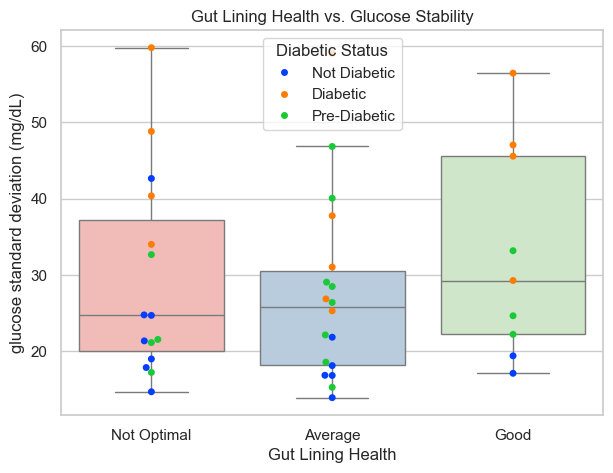

In [61]:
plot_gut_health_stability("Gut Lining Health")

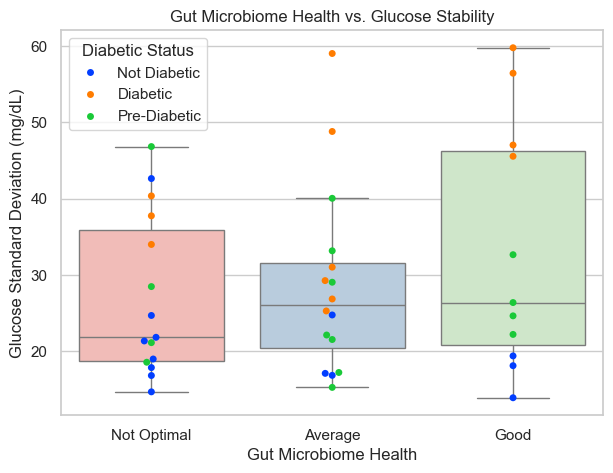

In [68]:
plot_gut_health_stability("Gut Microbiome Health")

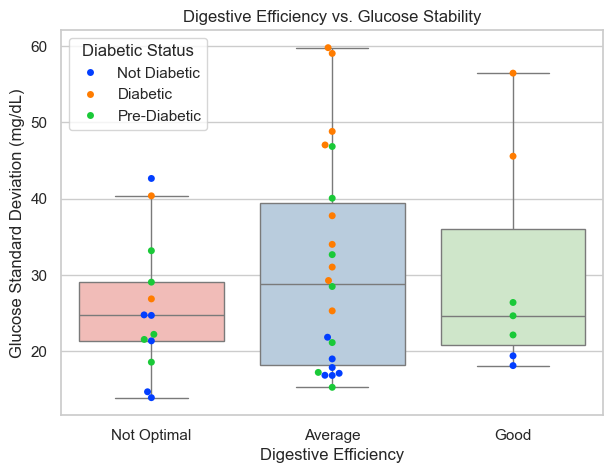

In [69]:
plot_gut_health_stability("Digestive Efficiency")

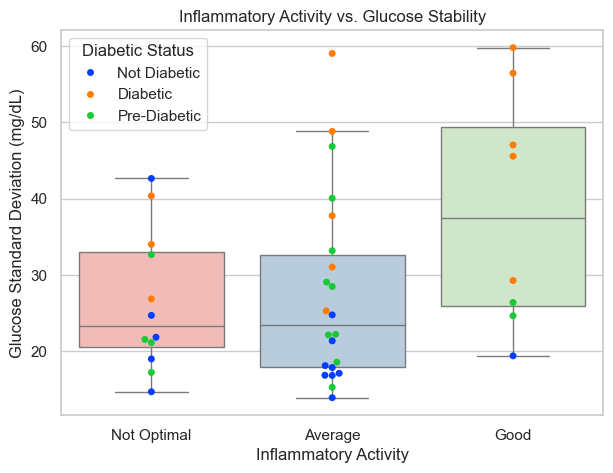

In [70]:
plot_gut_health_stability("Inflammatory Activity")

/var/folders/qz/mv_4p68n4lb9prgykyswxzdr0000gn/T/ipykernel_40700/3251675452.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


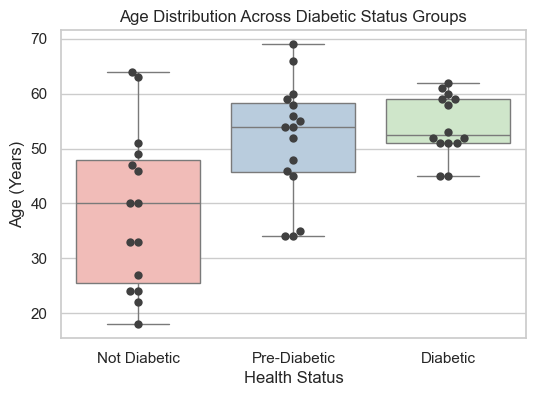

In [38]:
# bar plot of age
conn = sqlite3.connect('bem228_project.db')

col_name = "\"Diabetic Status\""
sql_query = f"SELECT Age, {col_name} FROM prelim_data"
read_df = pd.read_sql_query(sql_query, conn)

# Ensure the connection is closed
conn.close()

plt.figure(figsize=(6, 4))

# Set aesthetic style
sns.set_theme(style="whitegrid")

order = ["Not Diabetic", "Pre-Diabetic", "Diabetic"]

# 1. Create the Box Plot (The statistical summary)
sns.boxplot(
    data=read_df, 
    x='Diabetic Status', 
    y='Age', 
    palette='Pastel1', 
    order=order,
    showfliers=False
)

# 2. Overlay the Swarm Plot (The actual data points)
sns.swarmplot(
    data=read_df, 
    x='Diabetic Status', 
    y='Age', 
    color='.25', 
    order=order,
    size=6
)

plt.title('Age Distribution Across Diabetic Status Groups')
plt.xlabel('Health Status')
plt.ylabel('Age (Years)')
plt.show()

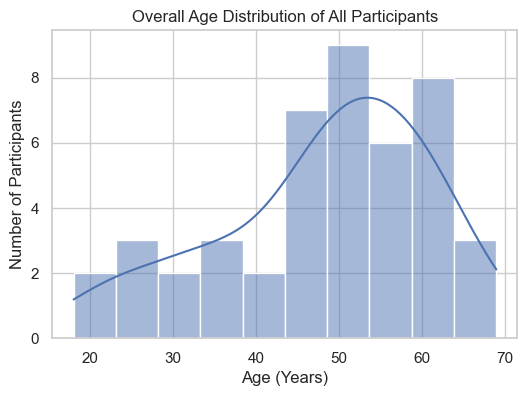

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))

# kde=True adds the smooth distribution line
# bins=10 is a good starting point for 45 people
sns.histplot(read_df['Age'], kde=True, bins=10)

plt.title('Overall Age Distribution of All Participants')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Participants')
plt.show()